In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

path = '../Life_Expectancy_preprocessed_v2.csv'
data = pd.read_csv(path)
cleanData = data.dropna()

X = cleanData[['Adult Mortality','Alcohol','BMI','HIV/AIDS','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']]
y = cleanData[['Developed']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logReg = LogisticRegression()
logReg.fit(X_train,y_train)

coef = logReg.coef_
intercept = logReg.intercept_

print(f"The Coefficient for the X values are: {coef}")
print(f"The Intercept is: {intercept}")

The Coefficient for the X values are: [[-0.01149161  0.4058046  -0.01263924 -3.60600308 -0.34368246  0.03308233
  -0.28361344  0.16007858]]
The Intercept is: [-3.5077839]


c:\Users\layoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\layoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
predictions = logReg.predict(X_test)

# for i, result in zip(X_test.values, predictions):
#     result_str = "Developed" if result == 1 else "Not Developed"
#     print(f"Features: {i}, Predicted result: {result_str}")

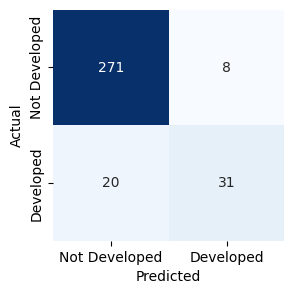

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, predictions)

# visualize
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=['Not Developed', 'Developed'], yticklabels=['Not Developed', 'Developed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [4]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy) 

Accuracy: 0.9151515151515152


In [5]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, predictions, target_names=['Not Developed', 'Developed'])

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
                precision    recall  f1-score   support

Not Developed       0.93      0.97      0.95       279
    Developed       0.79      0.61      0.69        51

     accuracy                           0.92       330
    macro avg       0.86      0.79      0.82       330
 weighted avg       0.91      0.92      0.91       330



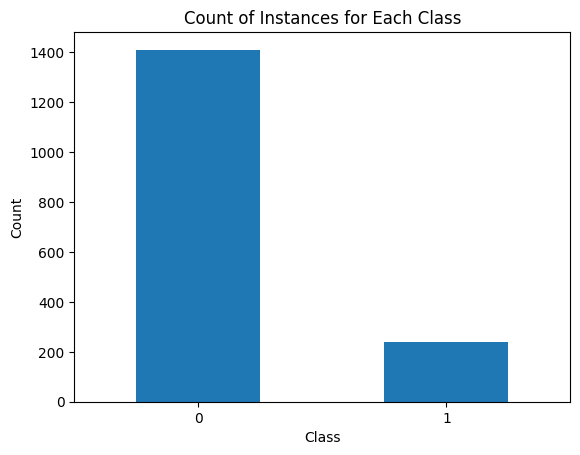

Count of Instances for Each Class:
Developed
0    1411
1     238
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt

class_counts = y['Developed'].value_counts()

# Create a bar plot
class_counts.plot(kind='bar')
plt.title("Count of Instances for Each Class")
plt.xticks(rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

class_counts = y['Developed'].value_counts()

print("Count of Instances for Each Class:")
print(class_counts)